In [2]:
install.packages("brms")
library(brms)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’, ‘bayesplot’


Loading required package: Rcpp

Loading 'brms' package (version 2.22.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
df <- read_csv("protien_mutations_dataset.csv")
head(df)

Rows: 2648 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): CLID, PDB, CHAIN, MUT
dbl (3): DDG, pH, T

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CLID,PDB,CHAIN,MUT,DDG,pH,T
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1A23A,1FVK,A,C30S,-1.79,7.5,25
1A23A,1FVK,A,C33S,-1.15,7.5,25
1A23A,1FVK,A,H32L,5.30,7.0,30
1A23A,1FVK,A,H32S,5.20,7.0,30
1A23A,1FVK,A,H32Y,6.80,7.0,30
1A43A,1A43,A,C218S,-3.70,7.3,25


In [10]:
fit_linear_reg<- brm(
  formula = DDG ~ T,
  data=df,
  family = gaussian(),
  prior = c(
    prior(normal(0,1),class = "Intercept"),
    prior(normal(0,0.1),class = "b"),
    prior(student_t(3,0,1),class = "sigma")
  ),
  chains = 4, iter = 10000, warmup = 2000, seed = 25
)

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 2001 / 10000 [ 20%]  (Sampling)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.225 seconds (Warm-up)
Chain 1:                0.726 seconds (Sampling)
Chain 1: 

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: DDG ~ T 
   Data: df (Number of observations: 2648) 
  Draws: 4 chains, each with iter = 10000; warmup = 2000; thin = 1;
         total post-warmup draws = 32000

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -1.53      0.06    -1.64    -1.41 1.00    34227    25973
T             0.02      0.00     0.01     0.02 1.00    42216    25445

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     1.44      0.02     1.41     1.48 1.00    21747    20398

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

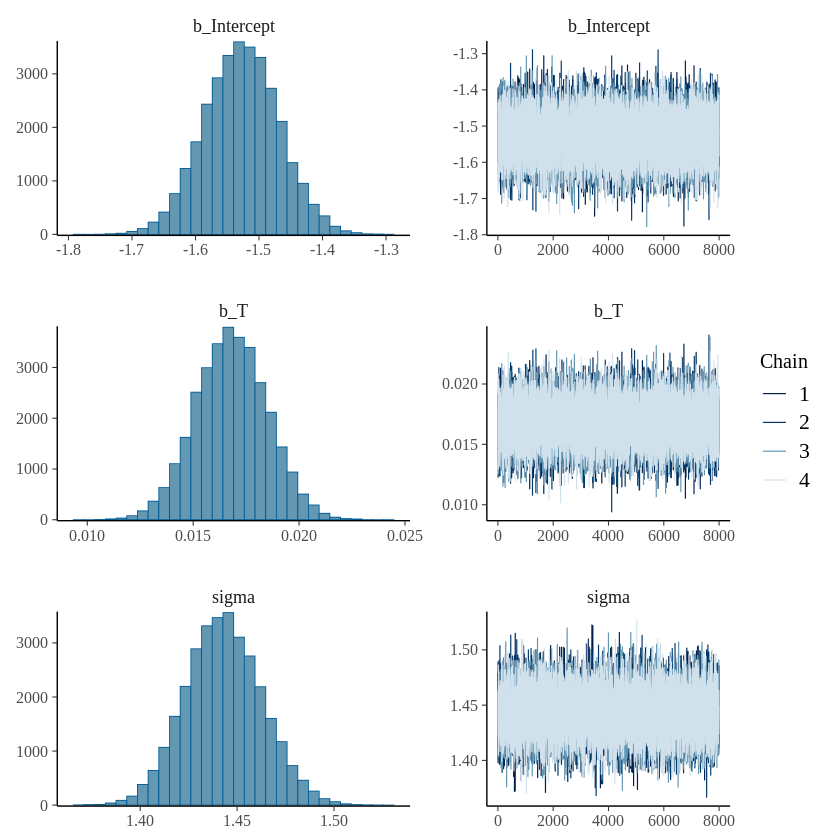

In [11]:
summary(fit_linear_reg)
plot(fit_linear_reg)

In [7]:
posterior_samples(fit_linear_reg)

Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”


b_Intercept,b_T,sigma,Intercept,lprior,lp__
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.439511,0.01554474,1.423324,-0.9632360,-3.641616,-4733.088
-1.455176,0.01649117,1.425242,-0.9499037,-3.631052,-4733.694
-1.459846,0.01634201,1.424931,-0.9591440,-3.639516,-4733.031
-1.611804,0.01951506,1.458338,-1.0138828,-3.731508,-4732.316
-1.512109,0.01562145,1.410919,-1.0334841,-3.697710,-4732.587
-1.579433,0.01773564,1.456284,-1.0360311,-3.751838,-4731.474
-1.475203,0.01504509,1.490968,-1.0142371,-3.768985,-4734.115
-1.553190,0.01825220,1.400786,-0.9939611,-3.646239,-4733.656
-1.554871,0.01865317,1.404139,-0.9833574,-3.639550,-4733.874


# **Interpretations**
Basyian Inference on how I understand it, is where we have a specific parameter $\theta$ where we define a prior assumption or guess for that parameter, where we would be defining a distribution for this assumption, suggesting how confident we are for this prior.

For instance, what we want to show is that there is relationship between ΔΔG and temperature. By the temperature-invariant ΔΔG hypothesis the relationship is assumed to be none, wherein ΔΔG and Temperature are independent form each other, by this we let the intercept to have a distribution centered around 0 with a normal distribution with a standard deviation of 1. However for the slope we defined a more strict normal distribution, where instead having a standard deviation of 1 we defined it to be 0.1, further supporting the temperature-invariant ΔΔG hypothesis.

Given this we would have a model that is modeled with the following:
$$△△G = \beta_0 + \beta_1\cdot T+𝛆$$
Further, based on our prior belief, when we scatter plot these values in a grid, we should see that the error follows a bell-like distribution, we used a distribution of student-t as it allows the model to be more robust to outliers and extreme values.

Now, given that we started on an assumption that there is no relationship, and then we introduce our data we have produced, based on the summary showed our best estimate for the slope be 0.02, with a confidence interval from 0.01 till 0.02. With an estimate error of 0, it indicates a very high confidence on the given estimate. Moreover, we can observe that the confidence interval does not cover 0, which is interesting because we started with saying the the slope $\beta_1$ is centered around 0, wherein we also even defined it to be very strict with a standard deviation 0.01 which is close to 0, however the model showed that it isn't centered around 0, thus suggesting a relationship between the two variables.

The MCMC method used was a built-in algorithm within brms, it is called No-U Turn Sampler (NUTS) where it is more efficient and robust, and moreover achieves that idea of MCMC where we define a markov chain and then starting with a guess you try to use that information whether or not it is a candidate to stay within the markov chain, thus giving a distribution based on how well it fits with the given data and prior belief.